<h1>MEDICAL INSURANCE PREDICTION</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [5]:
df = pd.read_csv('medical_cost_insurance.csv')

In [6]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
#There are no null values present in the dataset

<Axes: xlabel='region', ylabel='count'>

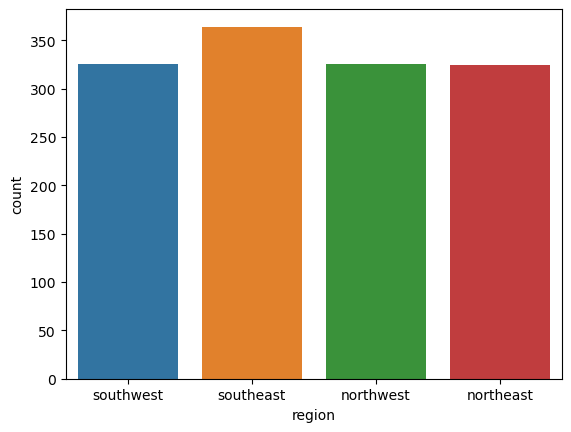

In [11]:
sns.countplot(data=df, x='region')

<Axes: xlabel='smoker', ylabel='count'>

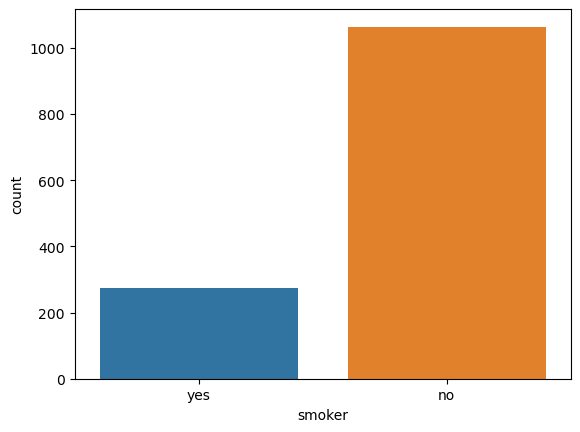

In [12]:
sns.countplot(data=df, x='smoker')

<Axes: xlabel='sex', ylabel='count'>

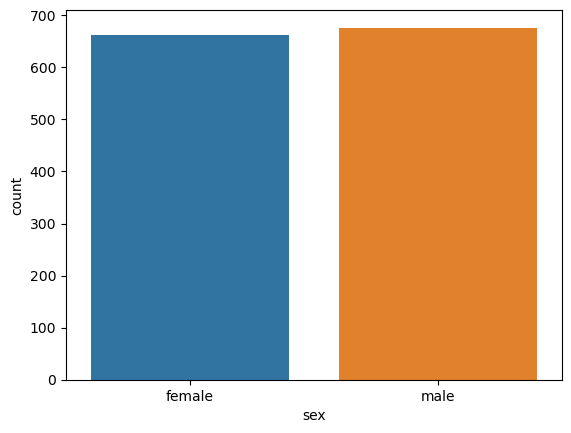

In [13]:
sns.countplot(data=df, x='sex')

<Axes: xlabel='bmi', ylabel='charges'>

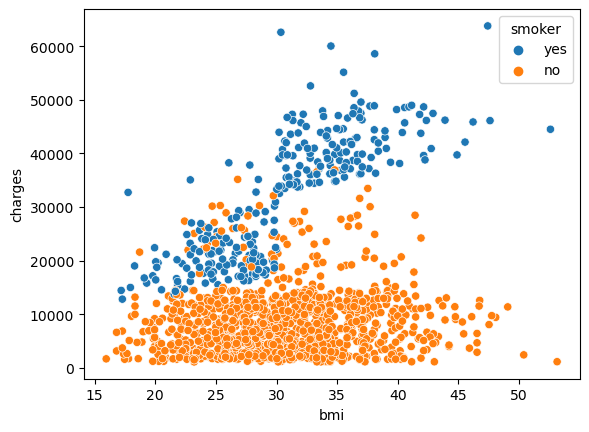

In [14]:
sns.scatterplot(data=df, x='bmi',y='charges',hue='smoker')

In [15]:
#We observe that people who smoke have higher charges

<Axes: xlabel='bmi', ylabel='charges'>

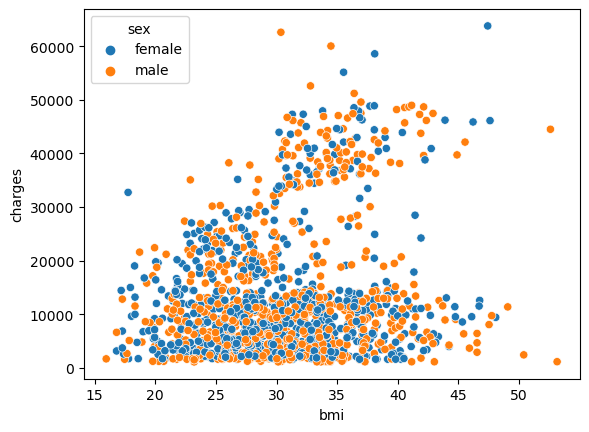

In [16]:
sns.scatterplot(data=df, x='bmi',y='charges',hue='sex')

<Axes: xlabel='age', ylabel='charges'>

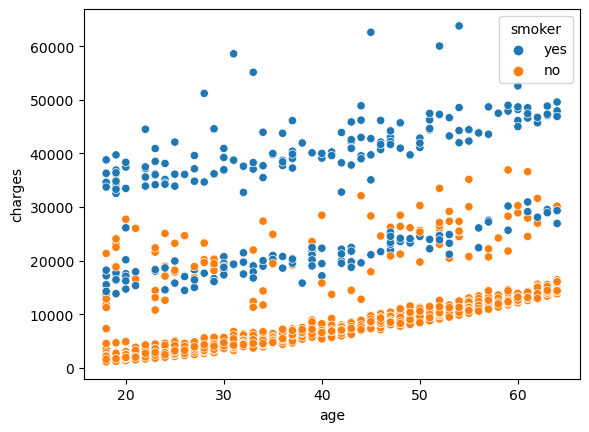

In [17]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker')

/home/devesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

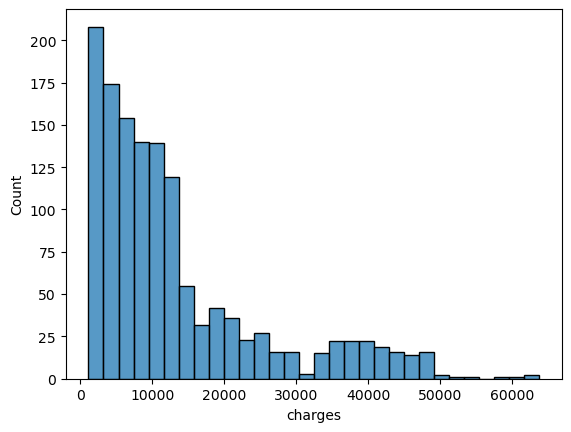

In [18]:
sns.histplot(data=df, x='charges')

In [19]:
df.duplicated().sum()

1

In [20]:
#There is one duplicate sample in the dataset we will drop it

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
#There are some object datatype values in the sample. we need to convert it

In [23]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

In [24]:
df['sex'] = df['sex'].apply(lambda x:1 if x=='female' else 0)

In [25]:
df

age  sex     bmi  children smoker     region      charges
0      19    1  27.900         0    yes  southwest  16884.92400
1      18    0  33.770         1     no  southeast   1725.55230
2      28    0  33.000         3     no  southeast   4449.46200
3      33    0  22.705         0     no  northwest  21984.47061
4      32    0  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    0  30.970         3     no  northwest  10600.54830
1334   18    1  31.920         0     no  northeast   2205.98080
1335   18    1  36.850         0     no  southeast   1629.83350
1336   21    1  25.800         0     no  southwest   2007.94500
1337   61    1  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

In [26]:
df['smoker']=df['smoker'].replace(to_replace=['yes','no'],value=[1,0])

In [27]:
df

age  sex     bmi  children  smoker     region      charges
0      19    1  27.900         0       1  southwest  16884.92400
1      18    0  33.770         1       0  southeast   1725.55230
2      28    0  33.000         3       0  southeast   4449.46200
3      33    0  22.705         0       0  northwest  21984.47061
4      32    0  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    0  30.970         3       0  northwest  10600.54830
1334   18    1  31.920         0       0  northeast   2205.98080
1335   18    1  36.850         0       0  southeast   1629.83350
1336   21    1  25.800         0       0  southwest   2007.94500
1337   61    1  29.070         0       1  northwest  29141.36030

[1337 rows x 7 columns]

In [28]:
df = pd.get_dummies(data=df,columns=['region'],dtype=int,drop_first=True)

In [29]:
df

age  sex     bmi  children  smoker      charges  region_northwest  \
0      19    1  27.900         0       1  16884.92400                 0   
1      18    0  33.770         1       0   1725.55230                 0   
2      28    0  33.000         3       0   4449.46200                 0   
3      33    0  22.705         0       0  21984.47061                 1   
4      32    0  28.880         0       0   3866.85520                 1   
...   ...  ...     ...       ...     ...          ...               ...   
1333   50    0  30.970         3       0  10600.54830                 1   
1334   18    1  31.920         0       0   2205.98080                 0   
1335   18    1  36.850         0       0   1629.83350                 0   
1336   21    1  25.800         0       0   2007.94500                 0   
1337   61    1  29.070         0       1  29141.36030                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                    1                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1333                 0                 0  
1334                 0                 0  
1335                 1                 0  
1336                 0                 1  
1337                 0                 0  

[1337 rows x 9 columns]

In [30]:
df.corr()

age       sex       bmi  children    smoker   charges  \
age               1.000000  0.019814  0.109344  0.041536 -0.025587  0.298308   
sex               0.019814  1.000000 -0.046397 -0.017848 -0.076596 -0.058044   
bmi               0.109344 -0.046397  1.000000  0.012755  0.003746  0.198401   
children          0.041536 -0.017848  0.012755  1.000000  0.007331  0.067389   
smoker           -0.025587 -0.076596  0.003746  0.007331  1.000000  0.787234   
charges           0.298308 -0.058044  0.198401  0.067389  0.787234  1.000000   
region_northwest  0.001495  0.012482 -0.136138  0.026044 -0.036321 -0.038695   
region_southeast -0.012311 -0.017578  0.270057 -0.023492  0.068282  0.073578   
region_southwest  0.009415  0.003767 -0.006211  0.021538 -0.037168 -0.043637   

                  region_northwest  region_southeast  region_southwest  
age                       0.001495         -0.012311          0.009415  
sex                       0.012482         -0.017578          0.003767  
bmi                      -0.136138          0.270057         -0.006211  
children                  0.026044         -0.023492          0.021538  
smoker                   -0.036321          0.068282         -0.037168  
charges                  -0.038695          0.073578         -0.043637  
region_northwest          1.000000         -0.345909         -0.320493  
region_southeast         -0.345909          1.000000         -0.346614  
region_southwest         -0.320493         -0.346614          1.000000

<Axes: >

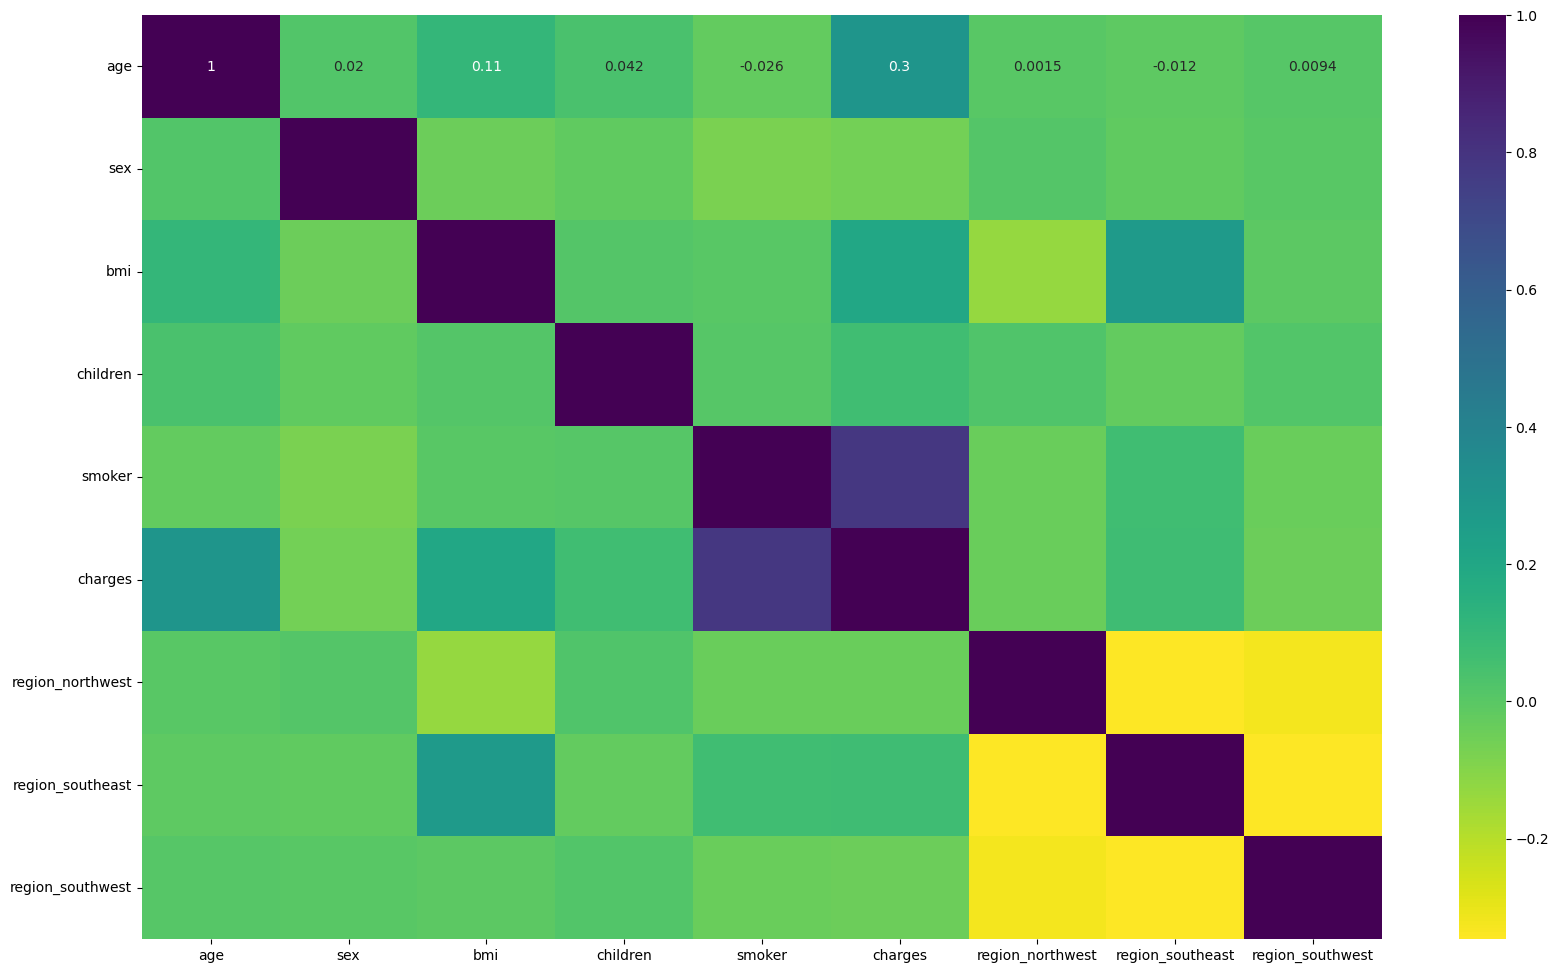

In [31]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, fmt='0.2g',cmap='viridis_r')

In [32]:
#Smoker is very influential factor in determing the insurance charges of a person

In [33]:
X = df.drop('charges',axis=1)

In [34]:
y = df['charges']

In [35]:
scaler=StandardScaler()

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
X_train.shape

(1069, 8)

In [38]:
scaler.fit(X_train)

StandardScaler()

In [39]:
X_train = scaler.transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

In [41]:
X_train

array([[-1.1576804 , -0.97140947, -0.99692768, ..., -0.57266946,
        -0.60581158, -0.57410974],
       [-1.30061876, -0.97140947, -0.79276204, ..., -0.57266946,
        -0.60581158, -0.57410974],
       [ 0.91492586,  1.029432  ,  1.15466402, ...,  1.74620801,
        -0.60581158, -0.57410974],
       ...,
       [-1.37208794, -0.97140947, -1.4118716 , ..., -0.57266946,
        -0.60581158,  1.74182728],
       [-0.08564268,  1.029432  , -0.41997378, ..., -0.57266946,
        -0.60581158,  1.74182728],
       [-0.30005022,  1.029432  ,  0.87941237, ..., -0.57266946,
         1.65067825, -0.57410974]])

In [42]:
linearregression = LinearRegression()

In [43]:
linearregression.fit(X_train,y_train)

LinearRegression()

In [44]:
lrpred = linearregression.predict(X_test)

In [45]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [46]:
r2_score(y_test,lrpred)

0.8069287081198013

In [47]:
mean_absolute_error(y_test,lrpred)

4177.045561036322

In [48]:
mean_squared_error(y_test,lrpred)

35478020.675235584

In [49]:
np.sqrt(mean_squared_error(y_test,lrpred))

5956.342894363586

<Axes: ylabel='charges'>

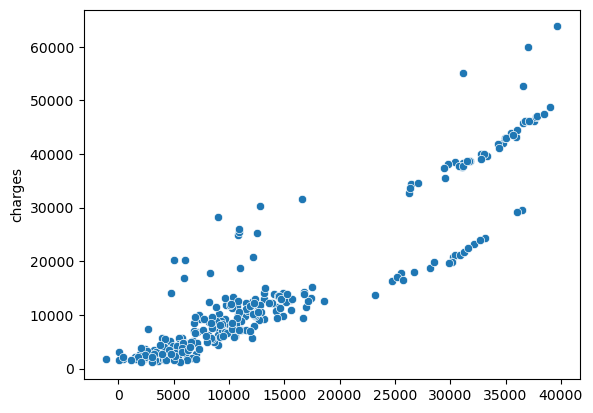

In [50]:
sns.scatterplot(x=lrpred,y=y_test)

In [51]:
randomforest = RandomForestRegressor()

In [52]:
randomforest.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
randomforestpred = randomforest.predict(X_test)

In [54]:
r2_score(y_test, randomforestpred)

0.8756962908622021

In [55]:
mean_absolute_error(y_test, randomforestpred)

2710.6574781973877

In [56]:
mean_squared_error(y_test, randomforestpred)

22841560.33687137

In [57]:
np.sqrt(mean_squared_error(y_test, randomforestpred))

4779.284500515885

<Axes: ylabel='charges'>

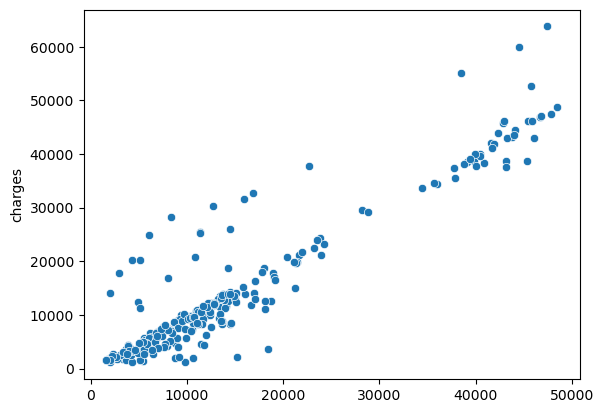

In [58]:
sns.scatterplot(x=randomforestpred,y=y_test)

In [59]:
svr = SVR()

In [60]:
svr.fit(X_train,y_train)

SVR()

In [61]:
svrpred = svr.predict(X_test)

In [62]:
r2_score(y_test,svrpred)

-0.13116125440762327

<Axes: xlabel='charges'>

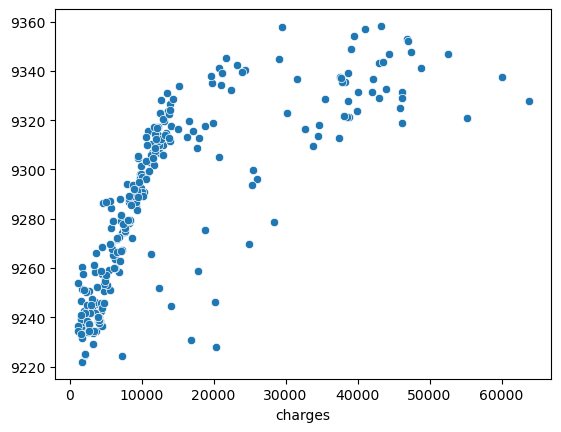

In [63]:
sns.scatterplot(x=y_test,y=svrpred)

In [64]:
#SUPPORT VECTOR MACHINE MODEL IS GIVING VERY WRONG PREDICTIONS WE WILL NOT USE THIS MODEL

In [65]:
dtr = DecisionTreeRegressor()

In [66]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [67]:
dtrpred=dtr.predict(X_test)

In [68]:
r2_score(y_test,dtrpred)

0.8048800905380997

In [69]:
gbr = GradientBoostingRegressor()

In [70]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [71]:
gbrpred = gbr.predict(X_test)

In [72]:
r2_score(y_test,gbrpred)

0.9018441931052618

In [73]:
print(mean_absolute_error(y_test,gbrpred))

2493.4825953074337


In [74]:
print(mean_squared_error(y_test,gbrpred))

18036724.737755306


In [75]:
np.sqrt(mean_squared_error(y_test,gbrpred))

4246.966533627891

<Axes: ylabel='charges'>

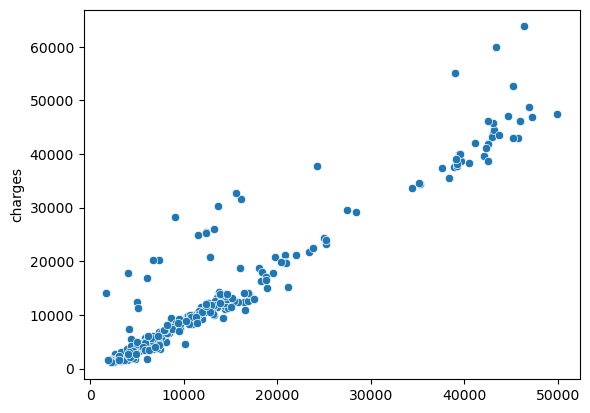

In [76]:
sns.scatterplot(x=gbrpred,y=y_test)

In [77]:
from xgboost import XGBRegressor

In [78]:
xgbregressor = XGBRegressor()

In [79]:
xgbregressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
xgbregressorpred=xgbregressor.predict(X_test)

In [107]:
r2_score(y_test,xgbregressorpred)

0.8651325342937666

In [92]:
#We will train gradient boosting model with hyperparameters

In [106]:
paramters = {
    'n_estimators':[10,15,20,25,50],
    'learning_rate':[0.1,0.15,0.2,0.3],
    'max_depth':[5,6,7,8],
    'min_samples_split':[11,13,15,17],
    'min_samples_leaf':[15,20,25,30],
    'max_features':[4,5,6,7,8]
}

In [108]:
grid = GridSearchCV(estimator=gbr, param_grid=paramters,n_jobs=-1,cv=5,verbose=4)

In [109]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 6400 candidates, totalling 32000 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, max_features=4, min_samples_leaf=15, min_samples_split=11, n_estimators=10;, score=0.705 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, max_features=4, min_samples_leaf=15, min_samples_split=11, n_estimators=50;, score=0.847 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=5, max_features=4, min_samples_leaf=15, min_samples_split=13, n_estimators=10;, score=0.687 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, max_features=4, min_samples_leaf=15, min_samples_split=13, n_estimators=10;, score=0.724 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, max_features=4, min_samples_leaf=15, min_samples_split=13, n_estimators=15;, score=0.770 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, max_features=4, min_samples_leaf=15, min_samples_split=13, n_estimators=15;, score=0.798 total time=   0.0s
[CV 3/5] END lea

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.15, 0.2, 0.3],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'min_samples_split': [11, 13, 15, 17],
                         'n_estimators': [10, 15, 20, 25, 50]},
             verbose=4)

In [110]:
grid.best_estimator_

GradientBoostingRegressor(learning_rate=0.3, max_depth=5, max_features=7,
                          min_samples_leaf=20, min_samples_split=11,
                          n_estimators=10)

In [111]:
grid.best_score_

0.8445414591707914

In [112]:
grid.best_params_

{'learning_rate': 0.3,
 'max_depth': 5,
 'max_features': 7,
 'min_samples_leaf': 20,
 'min_samples_split': 11,
 'n_estimators': 10}

In [113]:
#We will keep the basic gradient boosting model as hyperparameter tuning is not giving imroved result

In [116]:
import joblib

In [117]:
joblib.dump(gbr,'gbrmodel.pkl')

['gbrmodel.pkl']

In [118]:
#WE HAVE SUCCESSFULLY BUILT A MACHINE LEARNING MODEL WHICH PREDICTS THE INSURANCE CHARGES

In [1]:
import joblib

In [3]:
model = joblib.load(filename='gbrmodel.pkl')

In [4]:
import numpy as np

In [8]:
input = (18,1,25.700,0,1,0,1,0)

In [9]:
inputdata = np.asarray(input).reshape(1,-1)

In [10]:
model.predict(inputdata)

array([50445.5669108])

In [11]:
#Model predicts the charges